In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_ro_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        37.1093 (33.5703, 44.1721) (33.4706, 43.3433)  9.8726 (Jnode 202)\n',
 't_n104         6.2803 ( 4.3063,  8.8809) ( 4.1183,  8.6179)  4.4996 (Jnode 201)\n',
 't_n105         5.9294 ( 4.0775,  8.3772) ( 3.9078,  8.1173)  4.2095 (Jnode 200)\n',
 't_n106         5.1996 ( 3.5907,  7.2956) ( 3.4860,  7.1190)  3.6330 (Jnode 199)\n',
 't_n107         4.9941 ( 3.4499,  7.0113) ( 3.3267,  6.8036)  3.4769 (Jnode 198)\n',
 't_n108         4.6314 ( 3.2075,  6.4900) ( 3.0828,  6.3046)  3.2218 (Jnode 197)\n',
 't_n109         2.0896 ( 1.4297,  2.9362) ( 1.4015,  2.8962)  1.4947 (Jnode 196)\n',
 't_n110         2.0685 ( 1.4163,  2.9112) ( 1.3789,  2.8586)  1.4797 (Jnode 195)\n',
 't_n111         1.9976 ( 1.3673,  2.8120) ( 1.3226,  2.7536)  1.4310 (Jnode 194)\n',
 't_n112         1.9088 ( 1.3072,  2.6892) ( 1.2842,  2.6542)  1.3700 (Jnode 193)\n',
 't_n113         1.8284 ( 1.2506,  2.5743) ( 1.2073,  2.5218)  1.3145 (Jnode 192)\n',
 't_n114         1.3274 ( 0.8950,  1.8881) ( 0.8653,  

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    print(line)
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    # if line[3].startswith('('):
    #     lower_ci_iqtree.append(float(line[3][1:-1].strip()))
    # else:
    #     lower_ci_iqtree.append(float(line[3][1:-1].strip()))
    # print(line[4])
    # if line[4].startswith('('):
    #     
    #     upper_ci_iqtree.append(float(line[4][1:-1].strip()))
    # else:
    #     upper_ci_iqtree.append(float(line[4][:-1].strip()))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))

# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

['t_n103', '37.1093', '(33.5703,', '44.1721)', '(33.4706,', '43.3433)', '9.8726', '(Jnode', '202)']
['t_n104', '6.2803', '(', '4.3063,', '8.8809)', '(', '4.1183,', '8.6179)', '4.4996', '(Jnode', '201)']
['t_n105', '5.9294', '(', '4.0775,', '8.3772)', '(', '3.9078,', '8.1173)', '4.2095', '(Jnode', '200)']
['t_n106', '5.1996', '(', '3.5907,', '7.2956)', '(', '3.4860,', '7.1190)', '3.6330', '(Jnode', '199)']
['t_n107', '4.9941', '(', '3.4499,', '7.0113)', '(', '3.3267,', '6.8036)', '3.4769', '(Jnode', '198)']
['t_n108', '4.6314', '(', '3.2075,', '6.4900)', '(', '3.0828,', '6.3046)', '3.2218', '(Jnode', '197)']
['t_n109', '2.0896', '(', '1.4297,', '2.9362)', '(', '1.4015,', '2.8962)', '1.4947', '(Jnode', '196)']
['t_n110', '2.0685', '(', '1.4163,', '2.9112)', '(', '1.3789,', '2.8586)', '1.4797', '(Jnode', '195)']
['t_n111', '1.9976', '(', '1.3673,', '2.8120)', '(', '1.3226,', '2.7536)', '1.4310', '(Jnode', '194)']
['t_n112', '1.9088', '(', '1.3072,', '2.6892)', '(', '1.2842,', '2.6542)', '

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[37.1093,
 6.2803,
 5.9294,
 5.1996,
 4.9941,
 4.6314,
 2.0896,
 2.0685,
 1.9976,
 1.9088,
 1.8284,
 1.3274,
 0.9401,
 0.7076,
 0.3947,
 1.4182,
 1.1926,
 1.9123,
 1.2363,
 1.8265,
 1.4489,
 1.1741,
 1.0035,
 1.7691,
 1.65,
 0.4734,
 1.9637,
 1.7498,
 1.3418,
 1.0622,
 1.2181,
 1.0925,
 0.9016,
 0.8973,
 4.2505,
 3.3977,
 4.7043,
 4.2376,
 3.8713,
 3.1651,
 1.7071,
 3.0976,
 2.6658,
 2.355,
 1.9723,
 3.7917,
 3.4426,
 0.8169,
 0.3738,
 5.4156,
 5.0209,
 4.4303,
 4.3252,
 4.6662,
 3.0443,
 3.8349,
 2.9642,
 6.0465,
 5.5893,
 5.0031,
 4.6336,
 3.9285,
 2.6663,
 3.4216,
 4.8482,
 1.6426,
 4.8585,
 3.1575,
 2.9911,
 2.8493,
 2.6529,
 2.4154,
 2.2872,
 2.1762,
 2.0525,
 1.8122,
 1.5547,
 1.2856,
 1.829,
 1.7129,
 1.3632,
 1.5076,
 2.0326,
 1.8585,
 1.6889,
 1.4483,
 0.9995,
 1.8891,
 1.692,
 1.4689,
 2.2646,
 2.1319,
 1.9675,
 1.7221,
 1.2238,
 1.981,
 1.2232,
 0.9538,
 0.3623,
 3.0462,
 2.5426]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_ro_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
#     
# # for line in var_data1:
# #     line = line.strip().split()
# #     # node_name.append(line[0])
# #     posterior_mean_var_baseml.append(float(line[1]))
# #     lower_ci_var_baseml.append(float(line[3][:-1]))
# #     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
# import matplotlib.pyplot as plt
# import numpy as np
# 
# # # Example data
# # # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# # posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# # 
# # # Credible intervals for MCMCtree
# # lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# # upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# # 
# # # Credible intervals for McmcDate
# # lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# # upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]
# 
# # Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [Cherry only calibrations]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_co.png')

In [11]:
posterior_mean_baseml

[37.1159,
 6.4587,
 6.011,
 5.2314,
 4.9871,
 4.4758,
 2.1077,
 2.0779,
 1.9691,
 1.8609,
 1.7533,
 1.2728,
 0.9021,
 0.6597,
 0.3845,
 1.3489,
 1.1074,
 1.8557,
 1.2007,
 1.7527,
 1.3765,
 1.0917,
 0.9903,
 1.7187,
 1.5835,
 0.5032,
 1.9458,
 1.709,
 1.3037,
 1.0247,
 1.189,
 1.044,
 0.8434,
 0.9303,
 4.0844,
 3.2957,
 4.6328,
 4.1149,
 3.6905,
 2.9752,
 1.6373,
 2.9332,
 2.4668,
 2.1175,
 1.7375,
 3.6717,
 3.2818,
 0.9006,
 0.4105,
 5.3143,
 4.7918,
 4.1165,
 4.0314,
 4.5179,
 2.9746,
 3.6644,
 2.766,
 6.1641,
 5.6355,
 4.9524,
 4.5204,
 3.8065,
 2.6704,
 3.2571,
 4.8274,
 1.792,
 4.8896,
 3.7801,
 3.3815,
 3.167,
 2.9164,
 2.603,
 2.4326,
 2.2856,
 2.1074,
 1.8146,
 1.5247,
 1.2567,
 1.8598,
 1.7153,
 1.3417,
 1.464,
 2.0981,
 1.8748,
 1.667,
 1.397,
 0.9634,
 1.9009,
 1.677,
 1.4333,
 2.3836,
 2.184,
 1.981,
 1.6896,
 1.1776,
 2.0486,
 1.3875,
 1.063,
 0.4227,
 3.5371,
 2.9204]

In [12]:
posterior_mean_iqtree

[37.1093,
 6.2803,
 5.9294,
 5.1996,
 4.9941,
 4.6314,
 2.0896,
 2.0685,
 1.9976,
 1.9088,
 1.8284,
 1.3274,
 0.9401,
 0.7076,
 0.3947,
 1.4182,
 1.1926,
 1.9123,
 1.2363,
 1.8265,
 1.4489,
 1.1741,
 1.0035,
 1.7691,
 1.65,
 0.4734,
 1.9637,
 1.7498,
 1.3418,
 1.0622,
 1.2181,
 1.0925,
 0.9016,
 0.8973,
 4.2505,
 3.3977,
 4.7043,
 4.2376,
 3.8713,
 3.1651,
 1.7071,
 3.0976,
 2.6658,
 2.355,
 1.9723,
 3.7917,
 3.4426,
 0.8169,
 0.3738,
 5.4156,
 5.0209,
 4.4303,
 4.3252,
 4.6662,
 3.0443,
 3.8349,
 2.9642,
 6.0465,
 5.5893,
 5.0031,
 4.6336,
 3.9285,
 2.6663,
 3.4216,
 4.8482,
 1.6426,
 4.8585,
 3.1575,
 2.9911,
 2.8493,
 2.6529,
 2.4154,
 2.2872,
 2.1762,
 2.0525,
 1.8122,
 1.5547,
 1.2856,
 1.829,
 1.7129,
 1.3632,
 1.5076,
 2.0326,
 1.8585,
 1.6889,
 1.4483,
 0.9995,
 1.8891,
 1.692,
 1.4689,
 2.2646,
 2.1319,
 1.9675,
 1.7221,
 1.2238,
 1.981,
 1.2232,
 0.9538,
 0.3623,
 3.0462,
 2.5426]

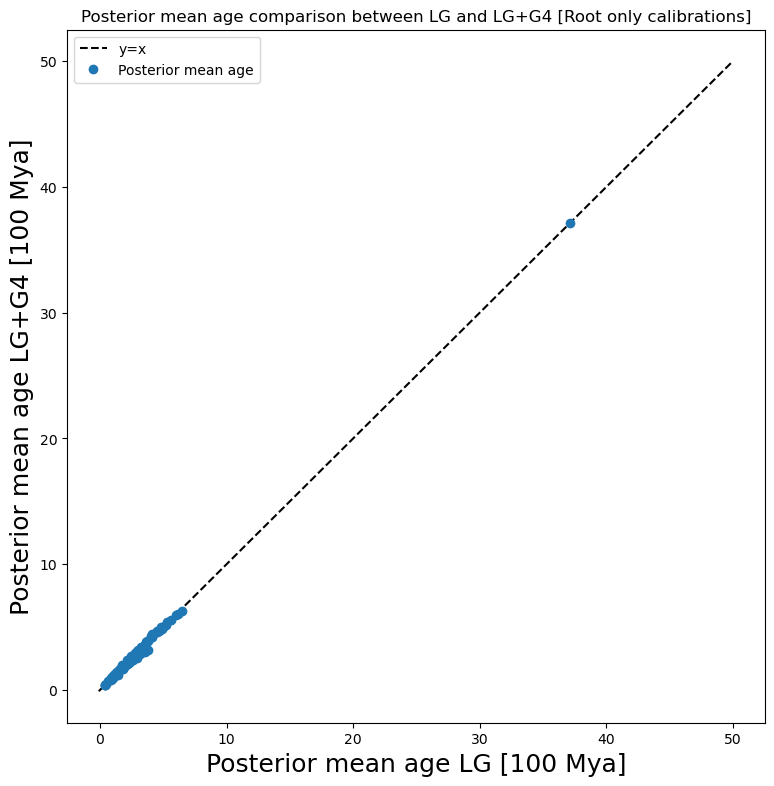

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4 [Root only calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_ro_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_co_scatter.png')